In [1]:
import numpy as np
from scipy.stats import bayes_mvs, linregress
from math import factorial
import scikits.bootstrap as bs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from scipy import mean
#from scipy.stats import chi2_contingency, ranksums, bayes_mvs, ttest_ind, ranksums
from warnings import filterwarnings
from scipy import stats
%matplotlib inline
filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid') # Setting up default plot displays
sns.set_context('paper', font_scale = 2.0, rc = {'lines.linewidth': 1.5, 'figure.figsize' : (10, 8)})
filterwarnings('ignore')

In [2]:
pwd

'/Users/nbhadra/Documents/github_Nivedita'

In [3]:
data = pd.read_csv('MOOC_Mock.csv')## example dataset

In [4]:
data.head(3)

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
0,1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
1,2,32,Male,6,10,No,Yes,57.0,109,38.8,45.3,7.08,19.8,No,No,Yes,8
2,3,19,Female,1,16,No,No,NaN,120,36.3,10.7,13.00,8.7,No,No,No,3


In [5]:
data['Gender'].value_counts()

Male      94
Female    56
Name: Gender, dtype: int64

In [6]:
data['ICU'].value_counts()

No     136
Yes     14
Name: ICU, dtype: int64

In [7]:
data['RVD'].value_counts()

No     96
Yes    54
Name: RVD, dtype: int64

In [8]:
data['Rupture'].value_counts()

No     90
Yes    60
Name: Rupture, dtype: int64

In [9]:
data['Histo'].value_counts()

Yes    120
No      30
Name: Histo, dtype: int64

# Descriptive statistics

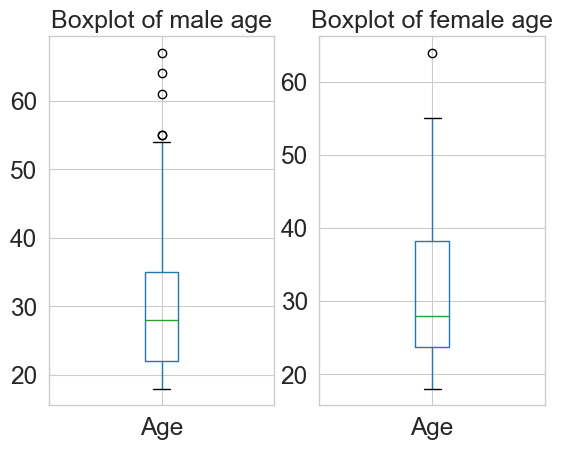

In [10]:
plt.subplot(1, 2, 1)
plt.title('Boxplot of male age', fontsize = 18)
data[data['Gender'] == 'Male'].boxplot(column = 'Age');
plt.subplot(1, 2, 2)
plt.title('Boxplot of female age', fontsize = 18)
data[data['Gender'] == 'Female'].boxplot(column = 'Age');

In [11]:
female = data[data['Gender'] == 'Female']

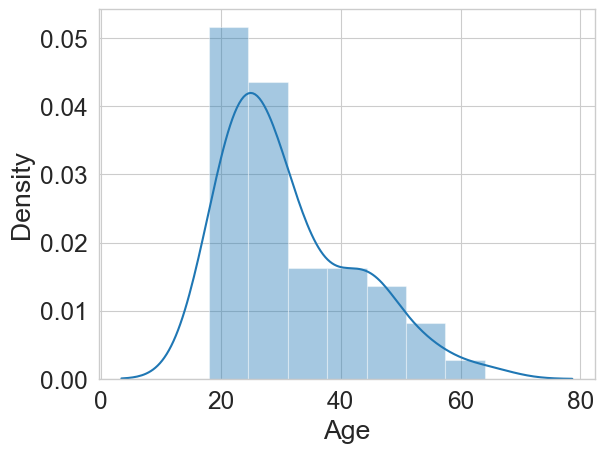

In [12]:
sns.distplot(female['Age']);

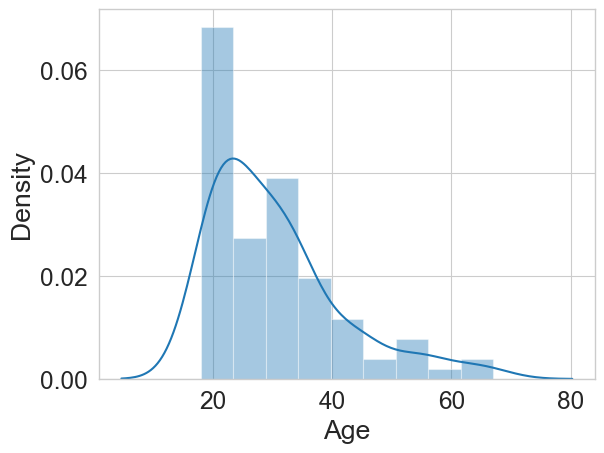

In [13]:
male = data[data['Gender'] == 'Male']
sns.distplot(male['Age']);

In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
data.set_index('File').head(3) # Changing the default index column to the File column

,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
File,,,,,,,,,,,,,,,,
1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
2,32,Male,6,10,No,Yes,57.0,109,38.8,45.3,7.08,19.8,No,No,Yes,8
3,19,Female,1,16,No,No,NaN,120,36.3,10.7,13.00,8.7,No,No,No,3


In [16]:
data['Age'].describe() #Identifying the Age column and calling the describe function lists the following

count    150.000000
mean      30.733333
std       10.920498
min       18.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       67.000000
Name: Age, dtype: float64

In [17]:
data['Delay'].describe()

count    150.000000
mean       3.206667
std        2.241454
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: Delay, dtype: float64

In [18]:
data['Stay'].describe()

count    150.000000
mean      10.886667
std        5.413799
min        2.000000
25%        6.000000
50%       11.000000
75%       15.000000
max       21.000000
Name: Stay, dtype: float64

In [19]:
RVD_neg = data[data['RVD'] == 'No'] # Only including the rows in the original DataFrame that have a Yes in the RVD column
RVD_neg_appx = RVD_neg[RVD_neg['Histo'] == 'Yes'] # Extracting only those who actually had appendicitis
RVD_pos = data[data['RVD'] == 'Yes'] # Doing the same but with No in the RVD column
RVD_pos_appx = RVD_pos[RVD_pos['Histo'] == 'Yes'] # Extracting only those who actually had appendicitis

In [20]:
RVD_neg_appx.head()

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
0,1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
7,8,19,Male,2,13,No,No,NaN,102,38.5,224.6,8.99,15.5,No,Yes,Yes,5
8,9,46,Male,2,9,No,No,NaN,107,36.2,385.1,10.26,15.5,No,Yes,No,1
9,10,19,Male,7,12,Yes,No,NaN,105,36.6,123,22.19,13.7,No,Yes,Yes,5
10,11,33,Male,2,14,No,No,NaN,104,36.8,NaN,16.20,12.7,No,Yes,No,9


In [21]:
RVD_pos_appx.head()

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
4,5,28,Female,3,3,No,Yes,491.0,115,37.1,51.6,21.98,13.4,No,Yes,No,7
6,7,36,Male,6,14,No,Yes,203.0,95,37.5,NaN,16.21,17.7,Yes,Yes,Yes,7
19,20,33,Female,1,19,No,Yes,203.0,123,37.5,46.5,8.00,10.4,No,Yes,Yes,8
31,32,39,Male,2,10,No,Yes,102.0,100,36.8,208,20.43,12.9,Yes,Yes,No,1
32,33,33,Male,0,21,No,Yes,266.0,100,39.7,194.1,7.31,10.7,Yes,Yes,Yes,3


In [22]:
RVD_neg_appx['WCC'].describe() # Describing the WCC column in the RVD_neg DataFrame

count    78.000000
mean     14.044103
std       4.347939
min       6.610000
25%      11.270000
50%      13.655000
75%      16.305000
max      26.400000
Name: WCC, dtype: float64

In [23]:
RVD_pos_appx['WCC'].describe() # Describing the WCC column in the RVD_pos DataFrame

count    40.000000
mean     15.773250
std       4.934148
min       2.950000
25%      12.475000
50%      15.575000
75%      19.920000
max      24.890000
Name: WCC, dtype: float64

In [24]:
bayes_mvs(RVD_neg_appx['WCC'].dropna(), 0.95)

(Mean(statistic=14.044102564102564, minmax=(13.063793818374444, 15.024411309830684)),
 Variance(statistic=19.408694495726504, minmax=(14.11088338425169, 26.648893927036053)),
 Std_dev(statistic=4.390869771933709, minmax=(3.7564455785025936, 5.162256670007416)))

In [25]:
bayes_mvs(RVD_pos_appx['WCC'].dropna(), 0.95)

(Mean(statistic=15.77325, minmax=(14.195232891628422, 17.35126710837158)),
 Variance(statistic=25.661807500000002, minmax=(16.33664662139605, 40.14009680082855)),
 Std_dev(statistic=5.031639944380193, minmax=(4.041861776631661, 6.33562126399839)))

In [26]:
bayes_mvs(RVD_pos_appx['WCC'], 0.8)

(Mean(statistic=15.77325, minmax=(14.756206821106424, 16.790293178893577)),
 Variance(statistic=25.661807500000002, minmax=(18.742423588894685, 33.67478051622629)),
 Std_dev(statistic=5.031639944380193, minmax=(4.329252081929936, 5.802997545771176)))

In [27]:
bs.ci(RVD_pos_appx['WCC'].dropna(), alpha = 0.05, n_samples = 10000)
# Note that we state the alpha value directly and here I use 10000 resamples

array([14.18625, 17.2375 ])

In [28]:
appx_neg = data[data['Histo'] == 'No']
appx_pos = data[data['Histo'] == 'Yes']

In [29]:
appx_neg['WCC'].describe()

count    29.000000
mean     11.544483
std       5.100563
min       4.220000
25%       7.700000
50%      10.910000
75%      14.530000
max      26.190000
Name: WCC, dtype: float64

In [30]:
appx_pos['WCC'].describe()

count    118.000000
mean      14.630254
std        4.607867
min        2.950000
25%       11.975000
50%       14.275000
75%       16.760000
max       26.400000
Name: WCC, dtype: float64

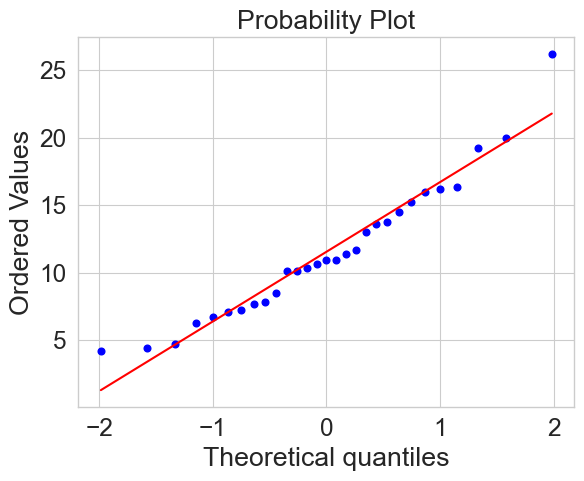

In [31]:
stats.probplot(appx_neg['WCC'].dropna(), dist = 'norm', plot = plt);

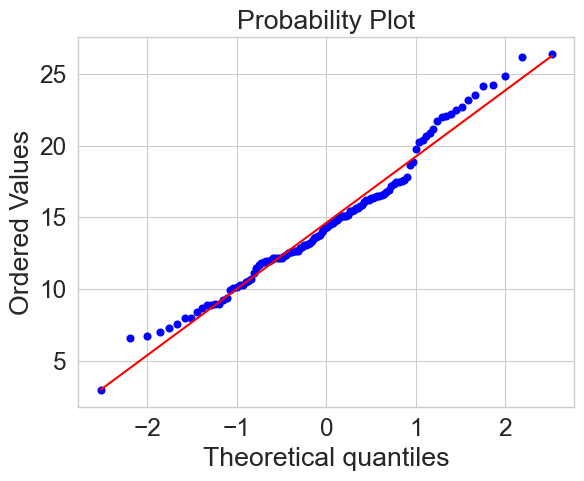

In [32]:
stats.probplot(appx_pos['WCC'].dropna(), dist = 'norm', plot = plt);

In [33]:
appx_neg['WCC'].var()

26.015747044334972

In [34]:
appx_pos['WCC'].var()

21.232438396349437

# t-test

In [35]:
t_stat, p_val = stats.ttest_ind(appx_neg['WCC'].dropna(), appx_pos['WCC'].dropna(), equal_var = True)
p_val

0.0019024340692918912

In [36]:
t_stat

-3.1629936640352385

In [37]:
t_stat_unequal, p_val_unequal = stats.ttest_ind(appx_neg['WCC'].dropna(), appx_pos['WCC'].dropna(), equal_var = False)
# This time I set equal_var to False
p_val_unequal

0.004972269753330877

In [38]:
t_stat_U, p_val_U = stats.mannwhitneyu(appx_neg['WCC'].dropna(), appx_pos['WCC'].dropna())

In [39]:
p_val_U * 2

0.0029346491779694184

In [40]:
histo_group = data.groupby(data['Histo'])
histo_group['RVD'].value_counts()

Histo  RVD
No     No     16
       Yes    14
Yes    No     80
       Yes    40
Name: RVD, dtype: int64

In [41]:
histo_RVD_observed = np.array([[16, 14], [80, 40]])
histo_RVD_observed

array([[16, 14],
       [80, 40]])

# Chi-squared test 

In [42]:
chi_val, p, df, expected = stats.chi2_contingency(histo_RVD_observed)

In [43]:
chi_val

1.3183593750000002

In [44]:
p

0.25088670393543633

In [45]:
expected

array([[19.2, 10.8],
       [76.8, 43.2]])

# Linear Regression 

<AxesSubplot:xlabel='WCC', ylabel='Temp'>

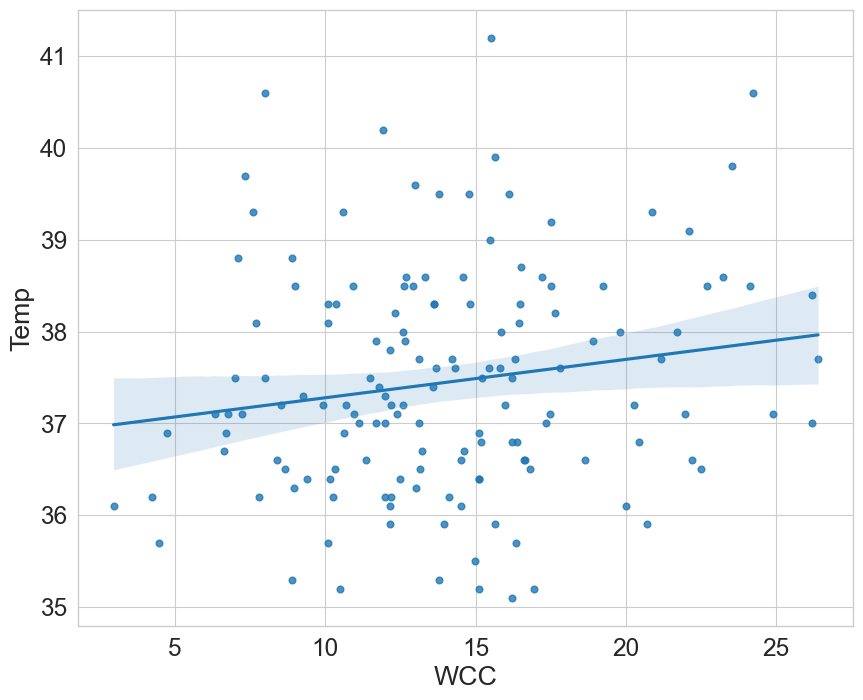

In [46]:
data_2 = data.dropna(subset = ['Temp', 'WCC'])

plt.figure(figsize = (10, 8))
sns.regplot(data_2['WCC'], data_2['Temp'], x_ci=95, scatter=True, fit_reg=True, ci=95, n_boot=1000, dropna=True,
            label='Correlating admission WCC and temperature', color=None)

In [47]:
slope, intercept, r_value, p_value, std_err = linregress(data_2['WCC'], data_2['Temp'])

# Calculating sensitivity and specifcity

In [48]:
appen_pos = data[data['Histo'] == 'Yes'] # A new DataFrame including only those with
# histologically proven appendicitis
appen_neg = data[data['Histo'] == 'No']

tp_all = appen_pos[appen_pos['WCC'] >= 12] # A new DataFrame object from the appen_pos
# DataFrame with a WCC of 12 or more as a positive result, hence true positive
fn_all = appen_pos[appen_pos['WCC'] < 12]

tn_all = appen_neg[appen_neg['WCC'] < 12]
fp_all = appen_neg[appen_neg['WCC'] >= 12]

In [49]:
tp_all['WCC'].dropna().describe()  # Just interested in the counts here

count    87.000000
mean     16.507471
std       3.729035
min      12.000000
25%      13.605000
50%      15.650000
75%      17.720000
max      26.400000
Name: WCC, dtype: float64

In [50]:
fn_all['WCC'].dropna().describe()

count    31.000000
mean      9.361935
std       2.010896
min       2.950000
25%       8.195000
50%       9.390000
75%      10.650000
max      11.990000
Name: WCC, dtype: float64

In [51]:
tn_all['WCC'].dropna().describe()

count    18.000000
mean      8.375000
std       2.481184
min       4.220000
25%       6.795000
50%       8.155000
75%      10.542500
max      11.700000
Name: WCC, dtype: float64

In [60]:
fp = fp_all['WCC'].dropna().describe()['count']
fn = fn_all['WCC'].dropna().describe()['count']
tp = tp_all['WCC'].dropna().describe()['count']
tn = tn_all['WCC'].dropna().describe()['count']

In [61]:
sens = tp / (tp + fn)
spec = tn / (tn + fp)

In [62]:
print('The sensitivity of a raised WCC in appendicitis is: ', (sens * 100), '%')

The sensitivity of a raised WCC in appendicitis is:  73.72881355932203 %


In [63]:
print('The specificity of a raised WCC in appendicitis is: ', (spec * 100), '%')

The specificity of a raised WCC in appendicitis is:  62.06896551724138 %


In [64]:
print('The negative predicitive value of a normal WCC (the chance of not having appendicitis given a negative result is', (tn * 100 / (tn + fn)), '%')

The negative predicitive value of a normal WCC (the chance of not having appendicitis given a negative result is 36.734693877551024 %


In [65]:
print('The positive predicitive value is :', (tp * 100 / (tp + fp)), '%')

The positive predicitive value is : 88.77551020408163 %
